In [19]:
%pylab inline
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftshift

# Forçar o uso de LaTeX
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


/opt/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


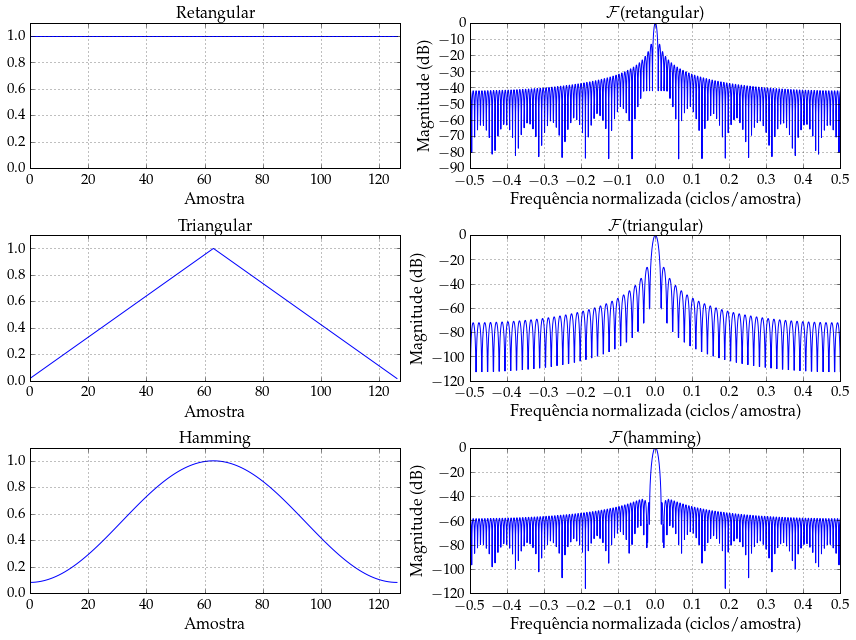

In [47]:
M = 127 # Tamanho da janela
rectang = signal.boxcar(M)
triang = signal.triang(M)
hamming = signal.hamming(M)

rectang_FFT = fft(rectang, 2048) / (len(rectang)/2.0)
freq = np.linspace(-0.5, 0.5, len(rectang_FFT))
rect_response = 20 * np.log10(np.abs(fftshift(rectang_FFT / abs(rectang_FFT).max())))

triang_FFT = fft(triang, 2048) / (len(triang)/2.0)
freq = np.linspace(-0.5, 0.5, len(triang_FFT))
tri_response = 20 * np.log10(np.abs(fftshift(triang_FFT / abs(triang_FFT).max())))

hamming_FFT = fft(hamming, 2048) / (len(hamming)/2.0)
freq = np.linspace(-0.5, 0.5, len(hamming_FFT))
hamming_response = 20 * np.log10(np.abs(fftshift(hamming_FFT / abs(hamming_FFT).max())))


f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 9))
ax1.plot(rectang)
ax2.plot(freq, rect_response)
ax3.plot(triang)
ax4.plot(freq, tri_response)
ax5.plot(hamming)
ax6.plot(freq, hamming_response)
ax1.set_title("Retangular", fontsize=16)
ax2.set_title("$\mathcal{F}$(retangular)", fontsize=16)
ax3.set_title("Triangular", fontsize=16)
ax4.set_title("$\mathcal{F}$(triangular)", fontsize=16)
ax5.set_title("Hamming", fontsize=16)
ax6.set_title("$\mathcal{F}$(hamming)", fontsize=16)

for ax in [ax1, ax3, ax5]:
    ax.set_xlim([0, 127])
    ax.set_ylim([0, 1.1])
    ax.set_xlabel("Amostra", fontsize=16)
    ax.grid()
    
for ax in [ax2, ax4, ax6]:
    ax.set_xlim([-0.5, 0.5])
    ax.set_xticks(linspace(-0.5, 0.5, 11))
    ax.set_xlabel("Frequ\^encia normalizada (ciclos/amostra)", fontsize=16)
    ax.set_ylabel("Magnitude (dB)", fontsize=16)
    ax.grid()
plt.tight_layout()
plt.savefig('window_functions.eps')


In [37]:
len(hamming)

127